In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [11]:
python_df = pd.read_csv('resultados_dijkstra_python.csv')
c_df = pd.read_csv('resultados_dijkstra_c.csv')
execucoes_c = pd.read_csv('todas_execucoes_c.csv', names=["Tamanho", "Caso", "Execucao", "Tempo (s)"])
execucoes_python = pd.read_csv('todas_execucoes_python.csv', names=["Tamanho", "Caso", "Execucao", "Tempo (s)"])
python_df['Linguagem'] = 'Python'
c_df['Linguagem'] = 'C'

### Comparação entre Linguagens

In [49]:
# Unir os dataframes
all_df = pd.concat([c_df, python_df], ignore_index=True)

# Parâmetros para os gráficos
casos = ['Melhor', 'Médio', 'Pior']
tamanhos = ['Pequeno', 'Médio', 'Grande']
linguagens = ['Python', 'C']
cores = {'Python': 'skyblue', 'C': 'orange'}

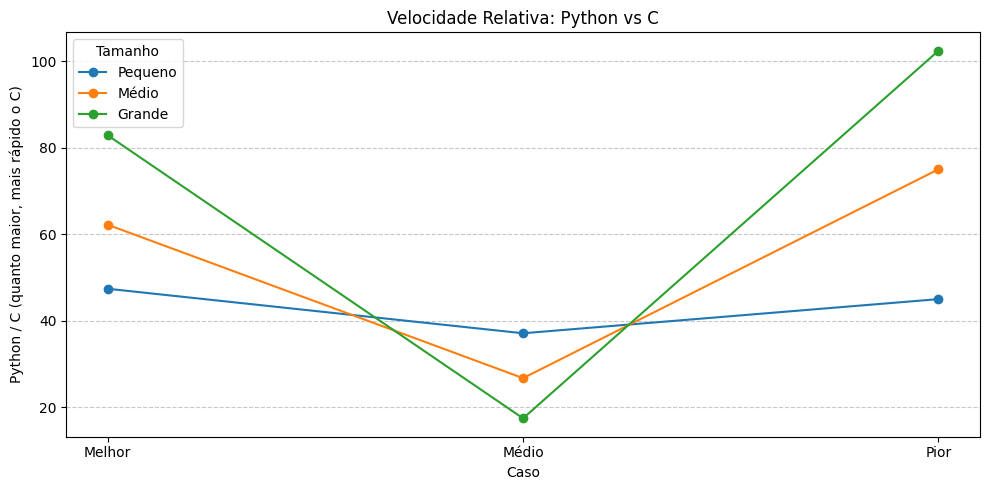

In [51]:
# Gráfico de velocidade relativa (C/Python)
plt.figure(figsize=(10,5))
for tamanho in tamanhos:
    rel_speed = []
    for caso in casos:
        tempo_py = all_df[(all_df['Tamanho'] == tamanho) & (all_df['Caso'] == caso) & (all_df['Linguagem'] == 'Python')]['Tempo médio'].values[0]
        tempo_c = all_df[(all_df['Tamanho'] == tamanho) & (all_df['Caso'] == caso) & (all_df['Linguagem'] == 'C')]['Tempo médio'].values[0]
        rel_speed.append(tempo_py/tempo_c)
    plt.plot(casos, rel_speed, marker='o', label=tamanho)
plt.xlabel('Caso')
plt.ylabel('Python / C (quanto maior, mais rápido o C)')
plt.title('Velocidade Relativa: Python vs C')
plt.legend(title='Tamanho')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# **Em C**

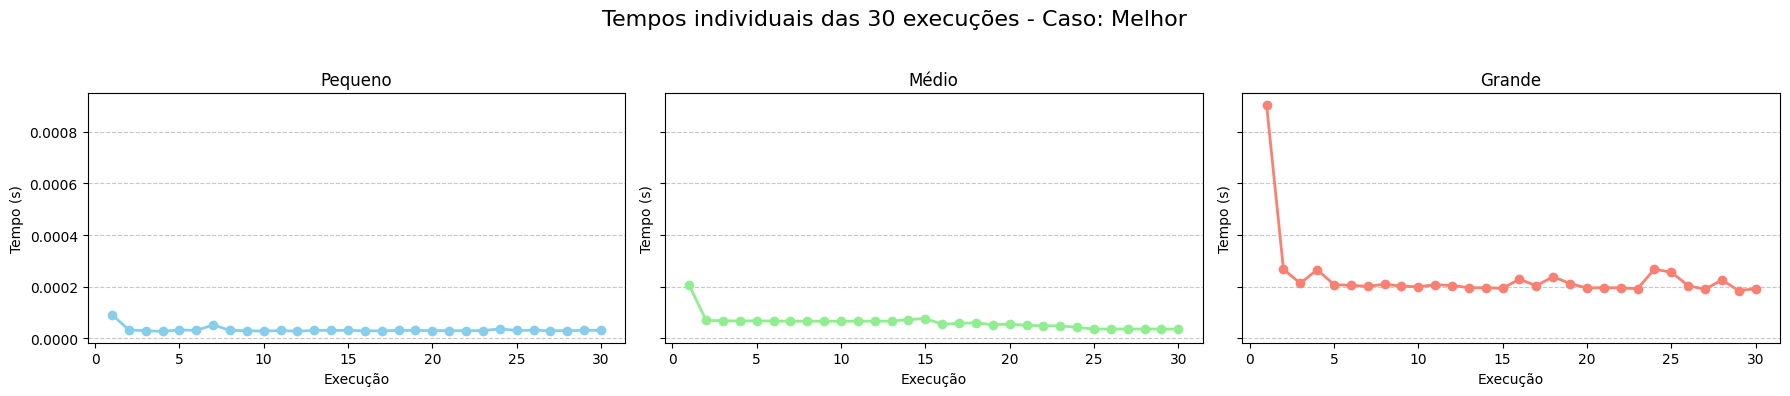

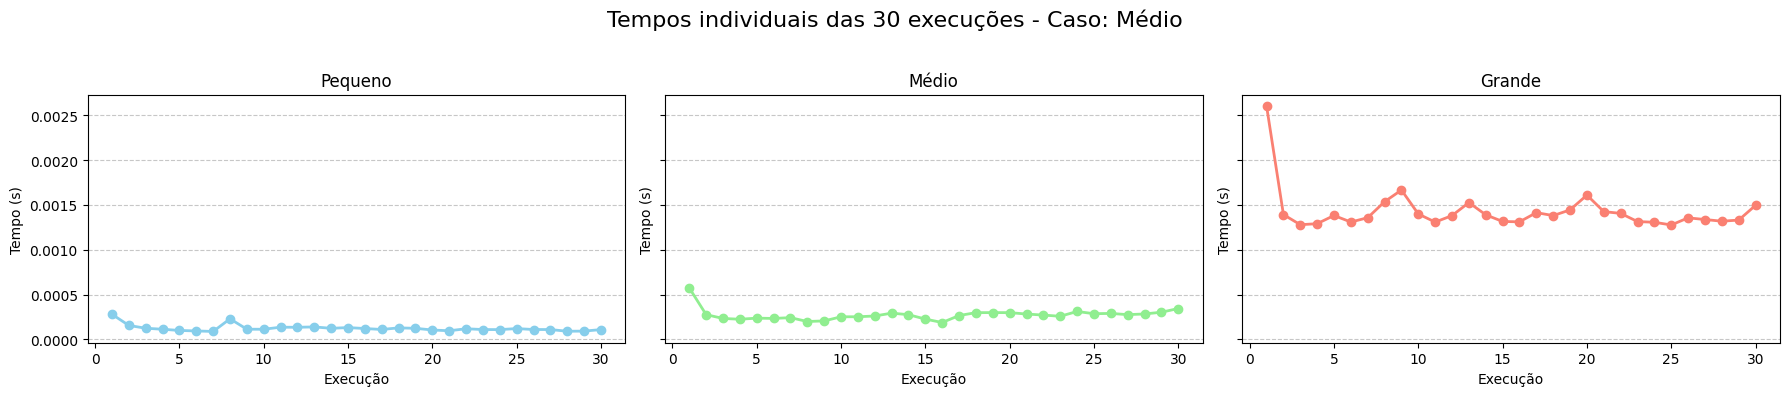

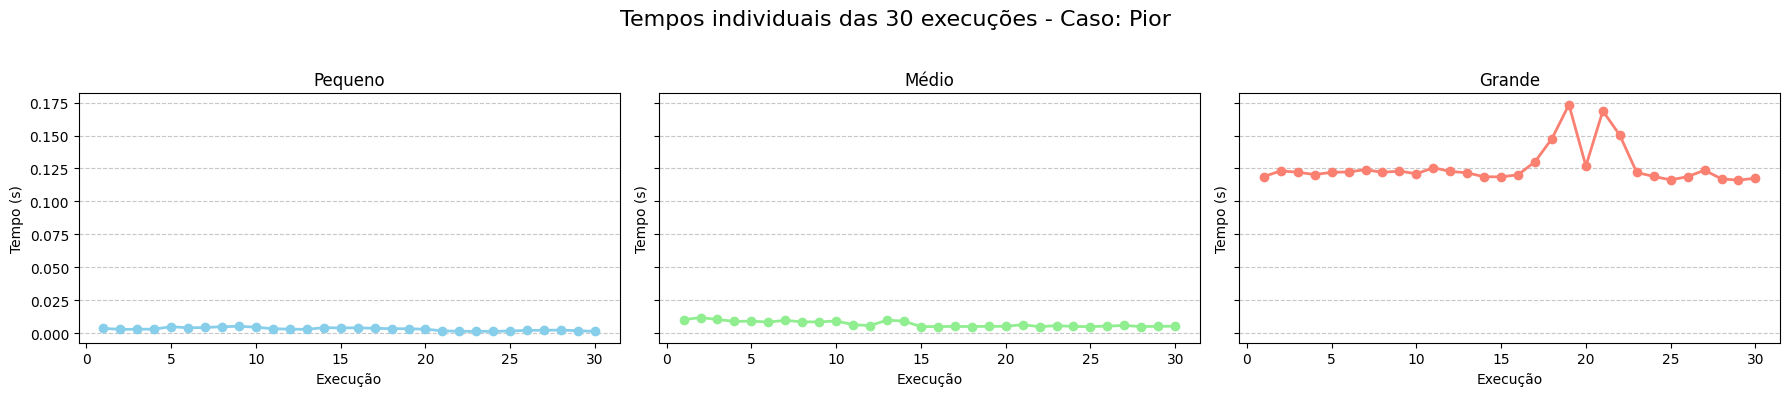

In [ ]:
# Carregar dados de todas as execuções em C
casos = ['Melhor', 'Médio', 'Pior']
tamanhos = ['Pequeno', 'Médio', 'Grande']
cores = {'Pequeno': 'skyblue', 'Médio': 'lightgreen', 'Grande': 'salmon'}

for caso in casos:
    fig, axs = plt.subplots(1, 3, figsize=(18,4), sharey=True)
    for idx, tamanho in enumerate(tamanhos):
        dados = execucoes_c[(execucoes_c['Caso'] == caso) & (execucoes_c['Tamanho'] == tamanho)]
        axs[idx].plot(dados['Execucao'], dados['Tempo (s)'], color=cores[tamanho], marker='o', linestyle='-', linewidth=2, markersize=6)
        axs[idx].set_title(f'{tamanho}')
        axs[idx].set_xlabel('Execução')
        axs[idx].set_ylabel('Tempo (s)')
        axs[idx].grid(axis='y', linestyle='--', alpha=0.7)
    fig.suptitle(f'Tempos individuais das 30 execuções - Caso: {caso}', fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

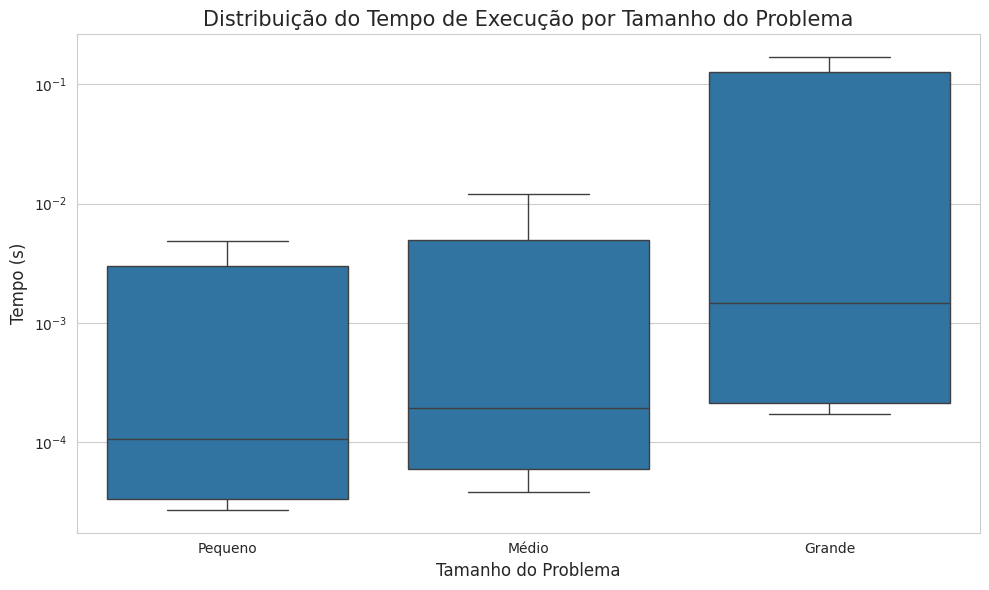

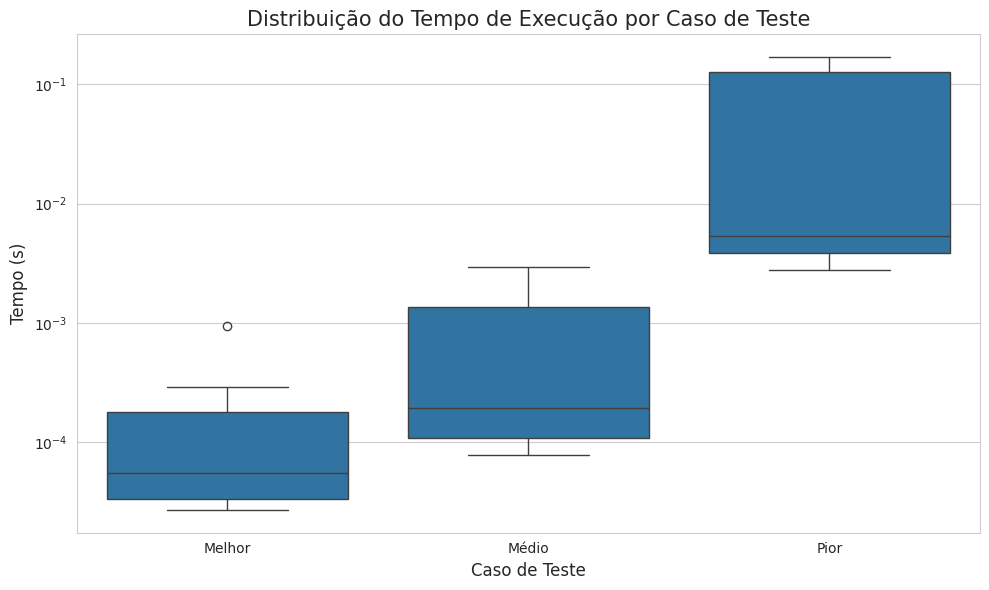

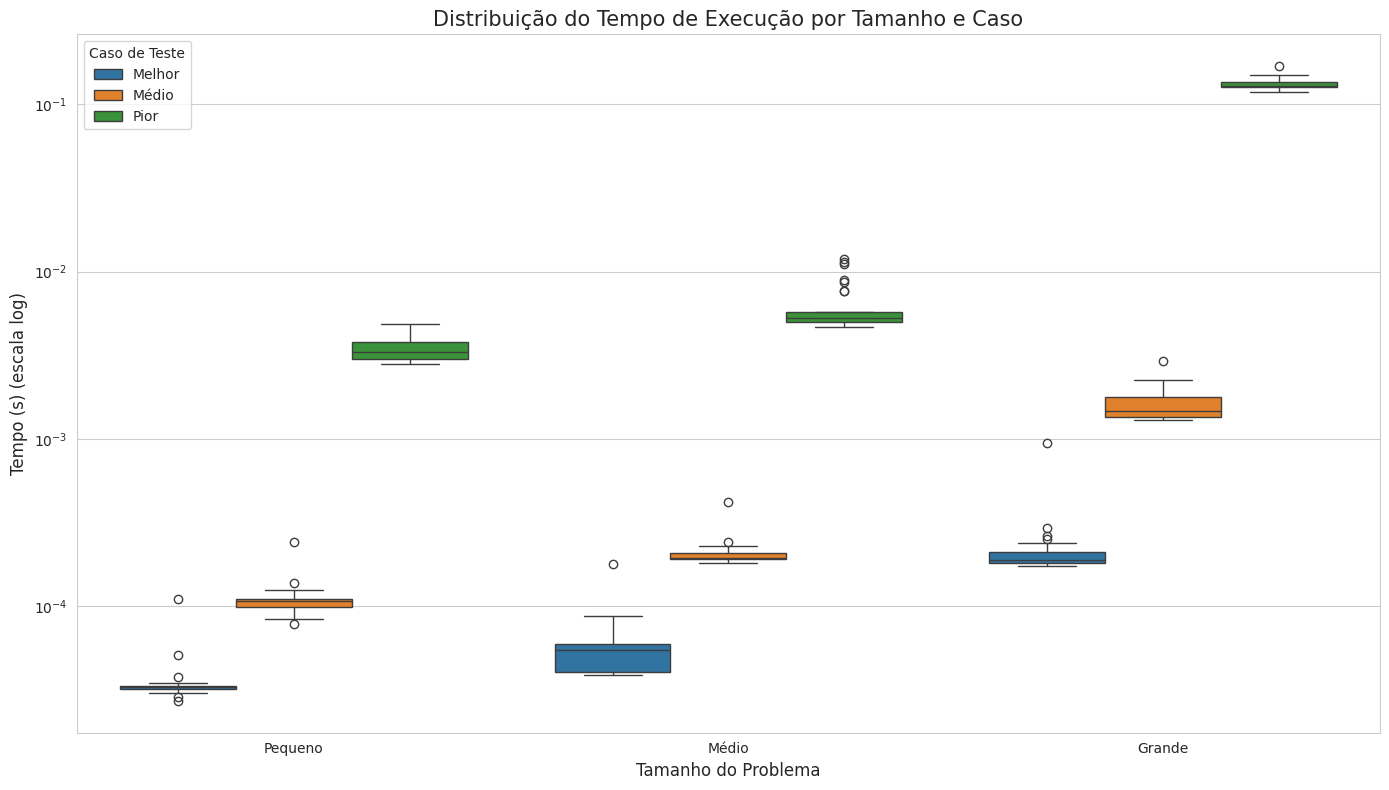

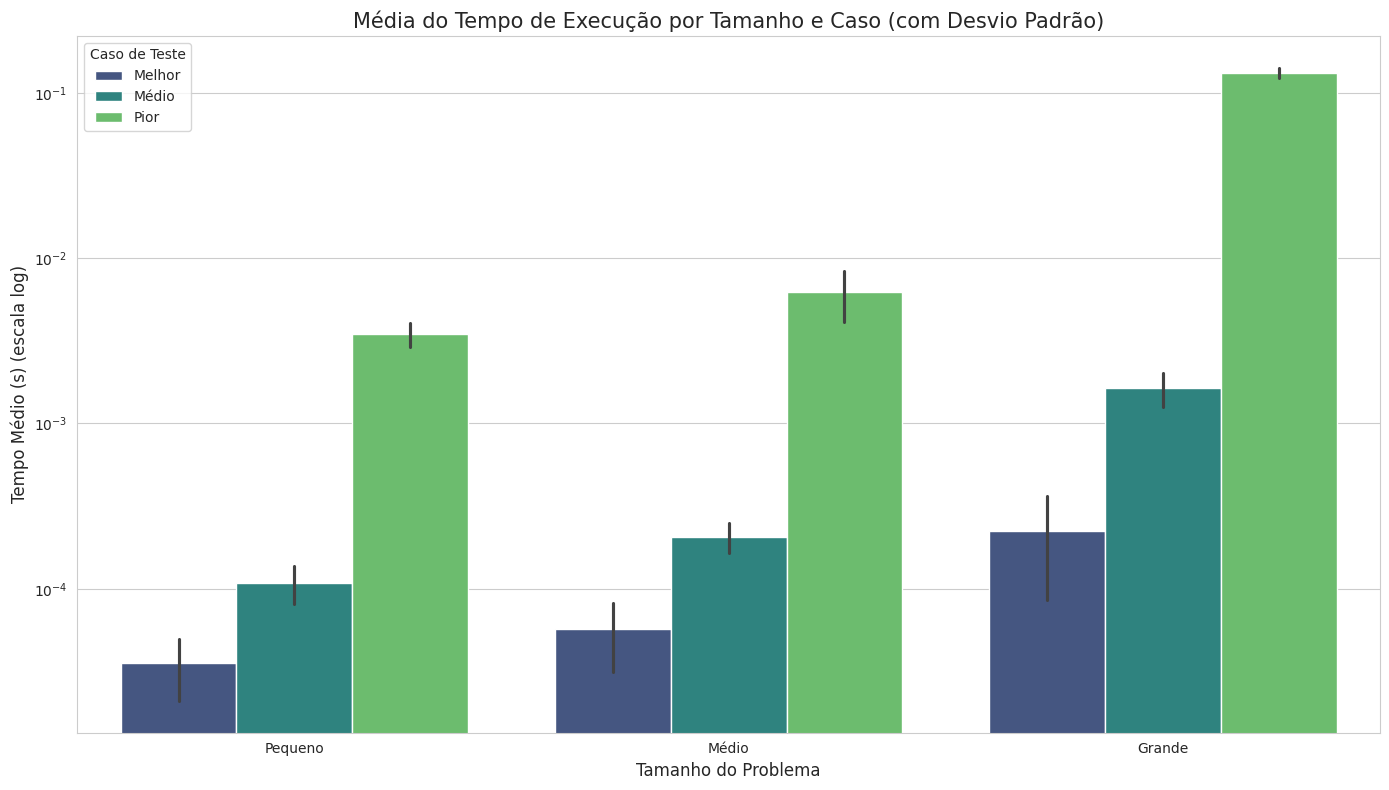

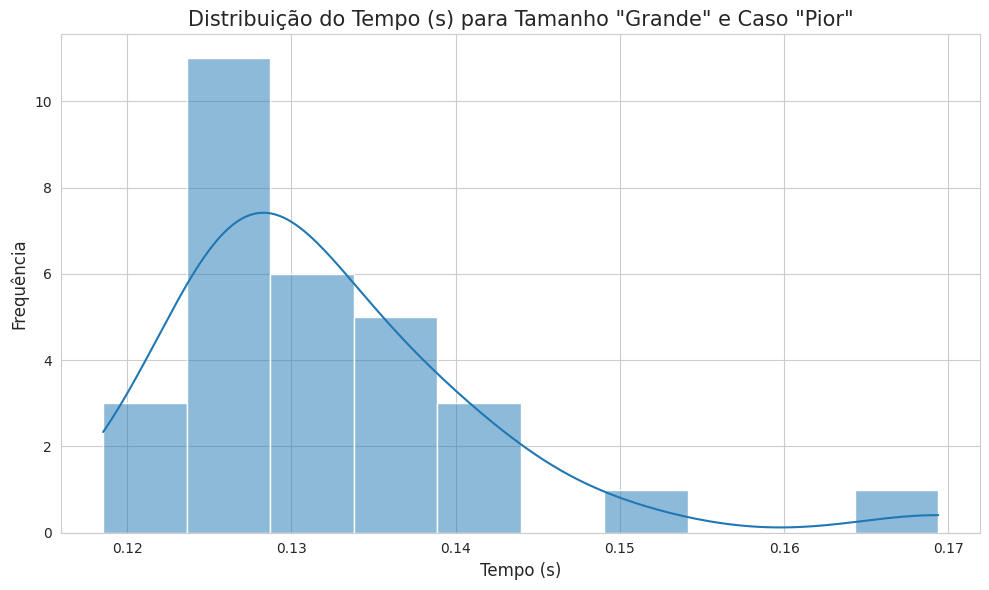

In [10]:
# Garantir que a coluna 'Tempo (s)' é numérica e remover linhas inválidas
execucoes_c["Tempo (s)"] = pd.to_numeric(execucoes_c["Tempo (s)"], errors="coerce")
execucoes_c = execucoes_c.dropna(subset=["Tempo (s)"])

sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))
sns.boxplot(x='Tamanho', y='Tempo (s)', data=execucoes_c, order=['Pequeno', 'Médio', 'Grande'])
plt.title('Distribuição do Tempo de Execução por Tamanho do Problema', fontsize=15)
plt.xlabel('Tamanho do Problema', fontsize=12)
plt.ylabel('Tempo (s)', fontsize=12)
plt.yscale('log') 
plt.tight_layout()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Caso', y='Tempo (s)', data=execucoes_c, order=['Melhor', 'Médio', 'Pior'])
plt.title('Distribuição do Tempo de Execução por Caso de Teste', fontsize=15)
plt.xlabel('Caso de Teste', fontsize=12)
plt.ylabel('Tempo (s)', fontsize=12)
plt.yscale('log') 
plt.tight_layout()

plt.figure(figsize=(14, 8))
sns.boxplot(x='Tamanho', y='Tempo (s)', hue='Caso', data=execucoes_c, 
            order=['Pequeno', 'Médio', 'Grande'], 
            hue_order=['Melhor', 'Médio', 'Pior'])
plt.title('Distribuição do Tempo de Execução por Tamanho e Caso', fontsize=15)
plt.xlabel('Tamanho do Problema', fontsize=12)
plt.ylabel('Tempo (s) (escala log)', fontsize=12)
plt.yscale('log') 
plt.legend(title='Caso de Teste')
plt.tight_layout()

execucoes_c_summary = execucoes_c.groupby(['Tamanho', 'Caso'])['Tempo (s)'].agg(['mean', 'std']).reset_index()
execucoes_c_summary['Tamanho'] = pd.Categorical(execucoes_c_summary['Tamanho'], categories=['Pequeno', 'Médio', 'Grande'], ordered=True)
execucoes_c_summary['Caso'] = pd.Categorical(execucoes_c_summary['Caso'], categories=['Melhor', 'Médio', 'Pior'], ordered=True)
execucoes_c_summary = execucoes_c_summary.sort_values(['Tamanho', 'Caso'])

plt.figure(figsize=(14, 8))
sns.barplot(x='Tamanho', y='Tempo (s)', hue='Caso', data=execucoes_c, 
            order=['Pequeno', 'Médio', 'Grande'],
            hue_order=['Melhor', 'Médio', 'Pior'],
            palette='viridis', estimator=pd.Series.mean, errorbar='sd') 
plt.title('Média do Tempo de Execução por Tamanho e Caso (com Desvio Padrão)', fontsize=15)
plt.xlabel('Tamanho do Problema', fontsize=12)
plt.ylabel('Tempo Médio (s) (escala log)', fontsize=12)
plt.yscale('log') 
plt.legend(title='Caso de Teste')
plt.tight_layout()

plt.figure(figsize=(10, 6))
execucoes_c_grande_pior = execucoes_c[(execucoes_c['Tamanho'] == 'Grande') & (execucoes_c['Caso'] == 'Pior')]
sns.histplot(data=execucoes_c_grande_pior, x='Tempo (s)', kde=True, bins=10)
plt.title('Distribuição do Tempo (s) para Tamanho "Grande" e Caso "Pior"', fontsize=15)
plt.xlabel('Tempo (s)', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.tight_layout()

# **Em Python**

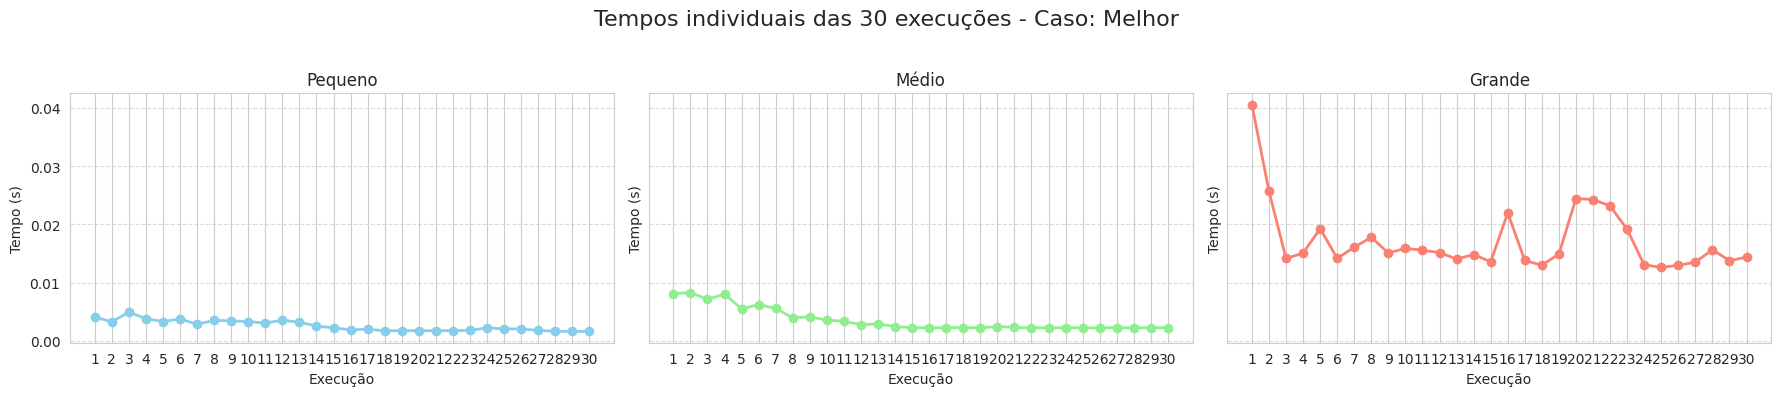

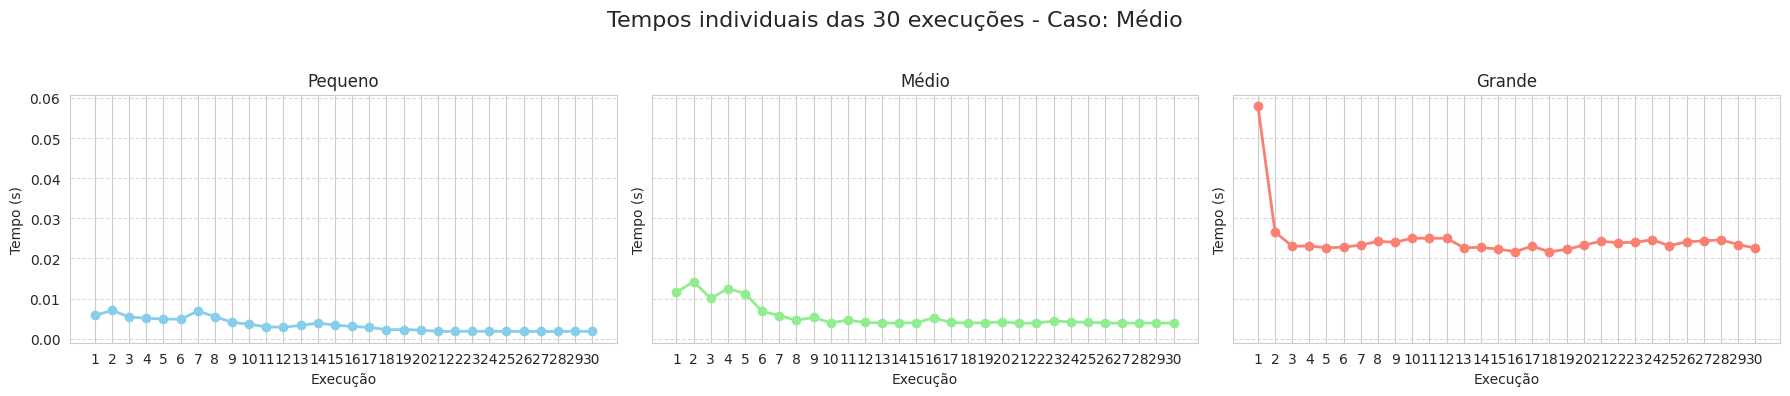

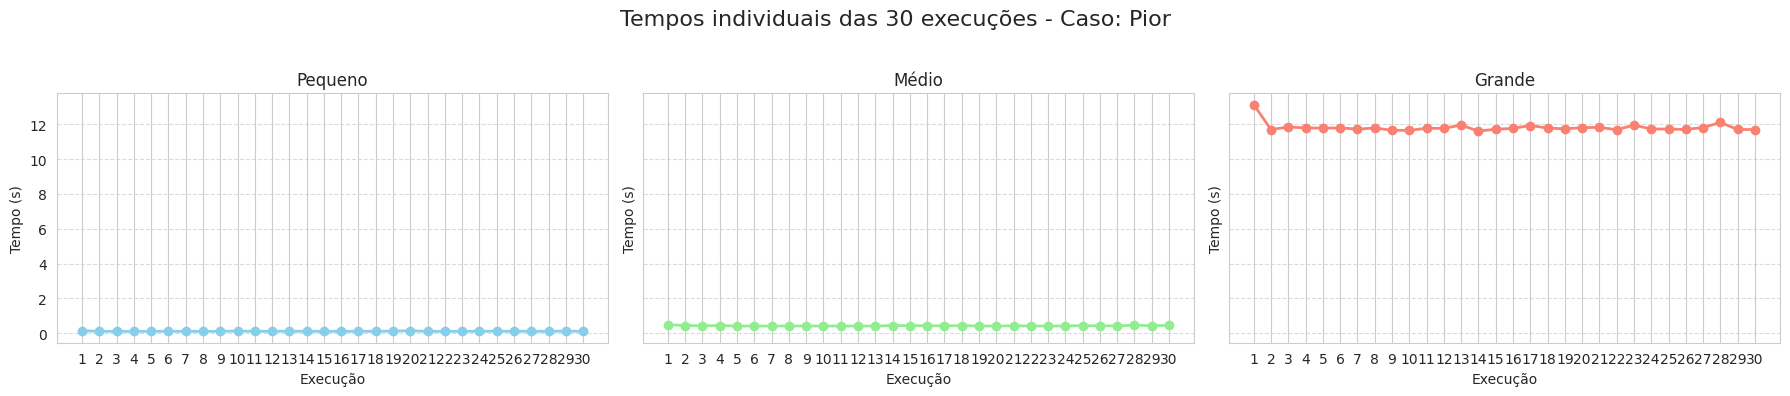

In [13]:
# Carregar dados de todas as execuções em Python
casos = ['Melhor', 'Médio', 'Pior']
tamanhos = ['Pequeno', 'Médio', 'Grande']
cores = {'Pequeno': 'skyblue', 'Médio': 'lightgreen', 'Grande': 'salmon'}

for caso in casos:
    fig, axs = plt.subplots(1, 3, figsize=(18,4), sharey=True)
    for idx, tamanho in enumerate(tamanhos):
        dados = execucoes_python[(execucoes_python['Caso'] == caso) & (execucoes_python['Tamanho'] == tamanho)]
        axs[idx].plot(dados['Execucao'], dados['Tempo (s)'], color=cores[tamanho], marker='o', linestyle='-', linewidth=2, markersize=6)
        axs[idx].set_title(f'{tamanho}')
        axs[idx].set_xlabel('Execução')
        axs[idx].set_ylabel('Tempo (s)')
        axs[idx].grid(axis='y', linestyle='--', alpha=0.7)
    fig.suptitle(f'Tempos individuais das 30 execuções - Caso: {caso}', fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

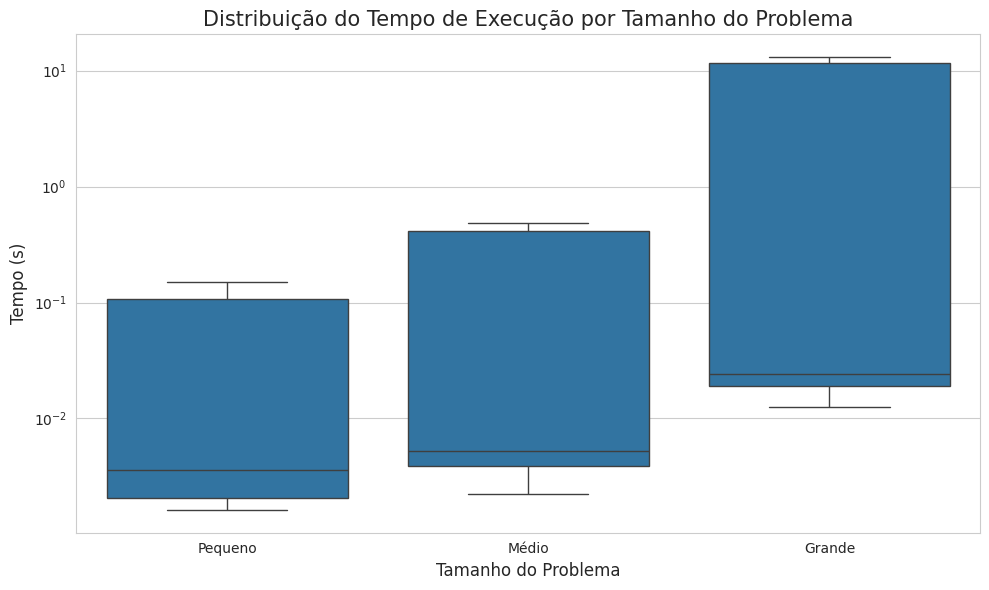

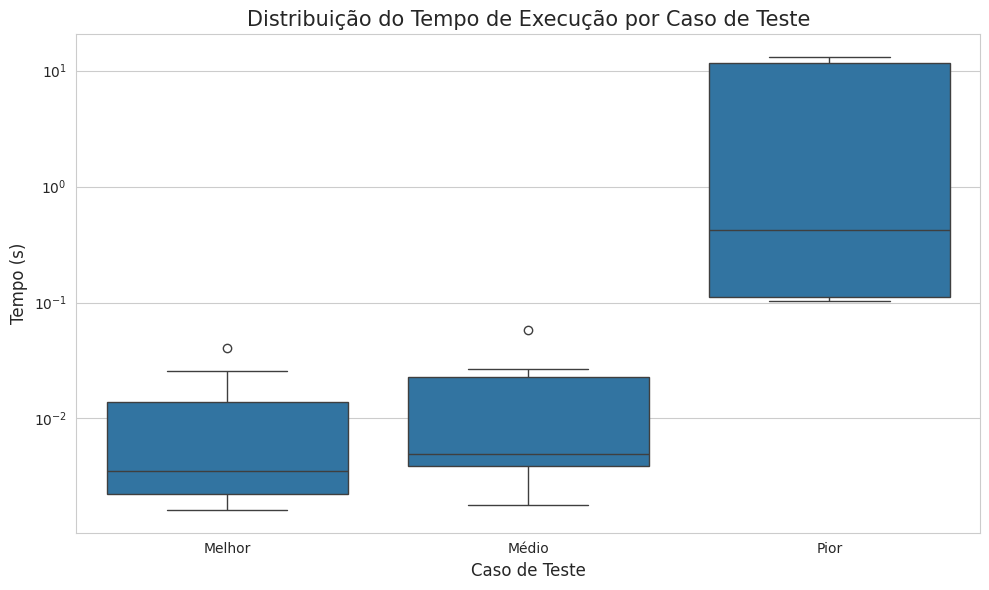

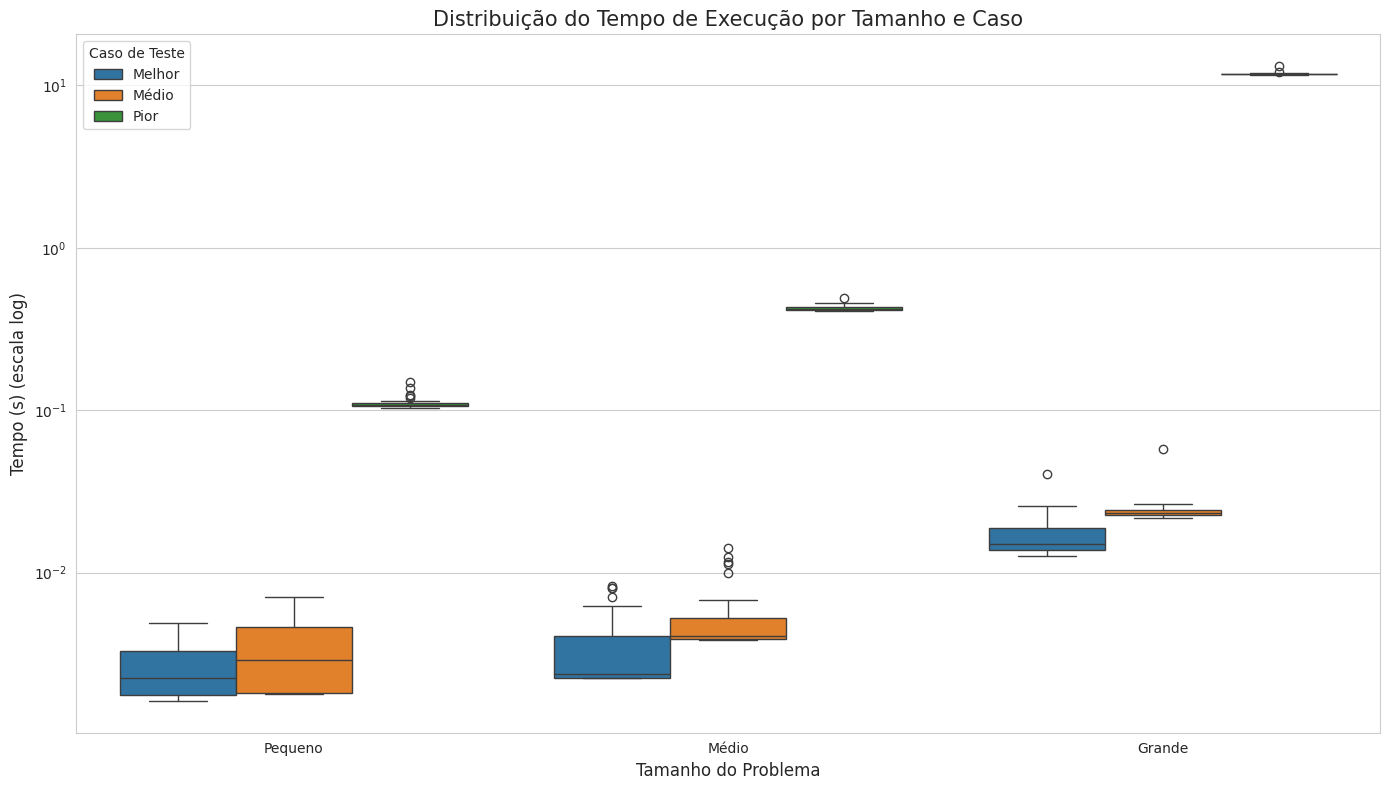

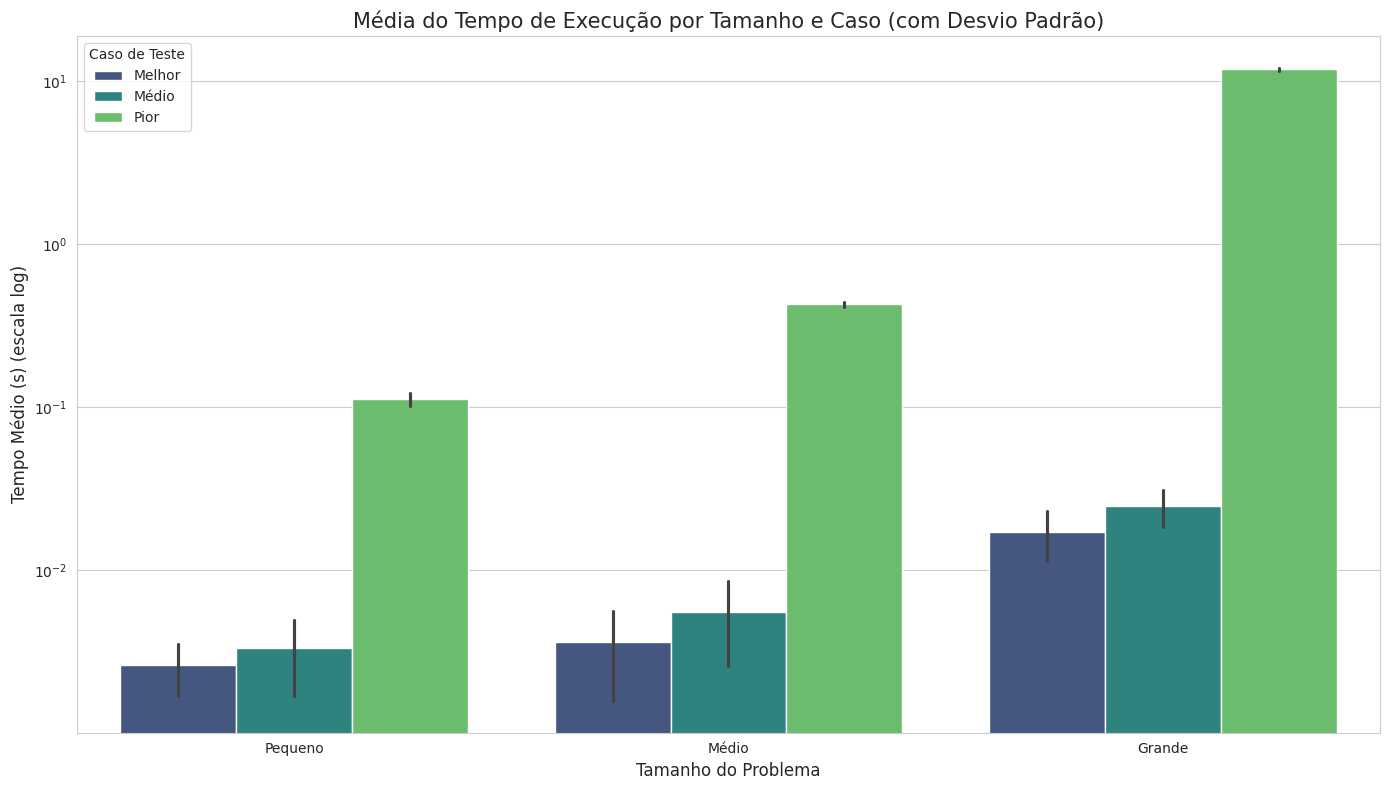

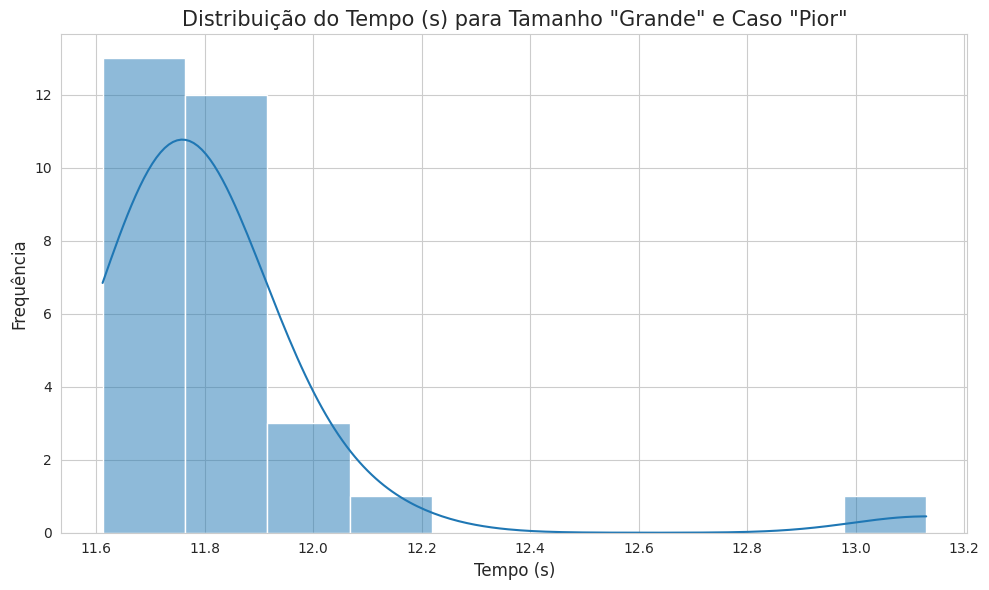

In [12]:
# Garantir que a coluna 'Tempo (s)' é numérica e remover linhas inválidas
execucoes_python["Tempo (s)"] = pd.to_numeric(execucoes_python["Tempo (s)"], errors="coerce")
execucoes_python = execucoes_python.dropna(subset=["Tempo (s)"])

sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))
sns.boxplot(x='Tamanho', y='Tempo (s)', data=execucoes_python, order=['Pequeno', 'Médio', 'Grande'])
plt.title('Distribuição do Tempo de Execução por Tamanho do Problema', fontsize=15)
plt.xlabel('Tamanho do Problema', fontsize=12)
plt.ylabel('Tempo (s)', fontsize=12)
plt.yscale('log') 
plt.tight_layout()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Caso', y='Tempo (s)', data=execucoes_python, order=['Melhor', 'Médio', 'Pior'])
plt.title('Distribuição do Tempo de Execução por Caso de Teste', fontsize=15)
plt.xlabel('Caso de Teste', fontsize=12)
plt.ylabel('Tempo (s)', fontsize=12)
plt.yscale('log') 
plt.tight_layout()

plt.figure(figsize=(14, 8))
sns.boxplot(x='Tamanho', y='Tempo (s)', hue='Caso', data=execucoes_python, 
            order=['Pequeno', 'Médio', 'Grande'], 
            hue_order=['Melhor', 'Médio', 'Pior'])
plt.title('Distribuição do Tempo de Execução por Tamanho e Caso', fontsize=15)
plt.xlabel('Tamanho do Problema', fontsize=12)
plt.ylabel('Tempo (s) (escala log)', fontsize=12)
plt.yscale('log') 
plt.legend(title='Caso de Teste')
plt.tight_layout()

execucoes_python_summary = execucoes_python.groupby(['Tamanho', 'Caso'])['Tempo (s)'].agg(['mean', 'std']).reset_index()
execucoes_python_summary['Tamanho'] = pd.Categorical(execucoes_python_summary['Tamanho'], categories=['Pequeno', 'Médio', 'Grande'], ordered=True)
execucoes_python_summary['Caso'] = pd.Categorical(execucoes_python_summary['Caso'], categories=['Melhor', 'Médio', 'Pior'], ordered=True)
execucoes_python_summary = execucoes_python_summary.sort_values(['Tamanho', 'Caso'])

plt.figure(figsize=(14, 8))
sns.barplot(x='Tamanho', y='Tempo (s)', hue='Caso', data=execucoes_python, 
            order=['Pequeno', 'Médio', 'Grande'],
            hue_order=['Melhor', 'Médio', 'Pior'],
            palette='viridis', estimator=pd.Series.mean, errorbar='sd') 
plt.title('Média do Tempo de Execução por Tamanho e Caso (com Desvio Padrão)', fontsize=15)
plt.xlabel('Tamanho do Problema', fontsize=12)
plt.ylabel('Tempo Médio (s) (escala log)', fontsize=12)
plt.yscale('log') 
plt.legend(title='Caso de Teste')
plt.tight_layout()

plt.figure(figsize=(10, 6))
execucoes_python_grande_pior = execucoes_python[(execucoes_python['Tamanho'] == 'Grande') & (execucoes_python['Caso'] == 'Pior')]
sns.histplot(data=execucoes_python_grande_pior, x='Tempo (s)', kde=True, bins=10)
plt.title('Distribuição do Tempo (s) para Tamanho "Grande" e Caso "Pior"', fontsize=15)
plt.xlabel('Tempo (s)', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.tight_layout()